# Modeling with `scikit-learn`
<br>
<center>
<img src="https://raw.githubusercontent.com/uc-r/Advanced-R/f1001a5b40b5e3803e4cd01a40c7129fee3afb39/docs/images/process-icon.svg" alt="fortune-teller.gif" width="300" height="300">
</center>

# What is Machine Learning?

## Pattern recognition

Patterns in shopping behavior:

<img src="images/patterns.png" alt="amazon" height="300">

Patterns in visual queues:

<img src="images/pattern1.jpeg" alt="street signs" height="300">

Patterns in everyday prices:

<img src="images/pattern2.jpeg" alt="toilet paper" height="300">

What is machine learning?

<img src="images/what_is_ml.jpeg" alt="What is machine learning" height="300">

## Types of machine learning

<img src="images/ml_types.png" alt="Types of machine learning" height="300">
<br>
<img src="images/ml_types2.jpeg" alt="Categories of machine learning" height="300">

# Supervised learning modeling process


<img src="images/machine_learning.png" alt="machine learning">

## Modeling Process

* The machine learning process is very iterative and heurstic-based

* Common for many ML approaches to be applied, evaluated, and modified before a final, optimal model can be determined

* A proper process needs to be implemented to have confidence in our results

<img src="https://uc-r.github.io/Advanced-R/images/modeling_process.png" alt="modeling-process" height="300">

## Modeling Process

This module provides an introduction to the modeling process and the concepts that are useful for any type of machine learning model:

* data splitting

* model application

* resampling

* hyperparameter tuning

* model evaluation

## Prerequisites - packages

In [2]:
# Helper packages
import math
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import seaborn as sns

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Prerequisites - Ames housing data

- __problem type__: supervised regression
- __response variable__: `Sale_Price` (i.e., \\$195,000, \\$215,000)
- __features__: 80 
- __observations__: 2,930
- __objective__: use property attributes to predict the sale price of a home

In [3]:
# Ames housing data
ames = pd.read_csv("../data/ames.csv")

In [4]:
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [ ]:
ames.head()

# <font color="red">Your Turn</font>

Take 5 minutes to explore the housing data

- What does the distribution of the response variable (`Sale_Price`) look like?

- How could the different features be helpful in predicting the sales price?

In [5]:
ames['Sale_Price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

<AxesSubplot:>

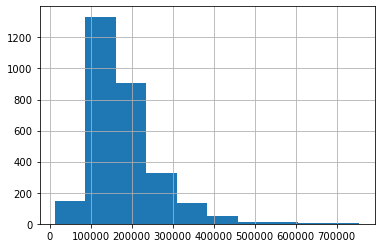

In [6]:
ames['Sale_Price'].hist()

# Data Splitting

## Generalizability

__Generalizability__: we want an algorithm that not only fits well to our past data, but more importantly, one that <font color="blue">predicts a future outcome accurately</font>.

* __Training Set__: these data are used to develop feature sets, train our algorithms, tune hyper-parameters, compare across models, and all of the other activities required to reach a final model decision.

* __Test Set__: having chosen a final model, these data are used to estimate an unbiased assessment of the model’s performance (generalization error).

<img src="images/all-split-1.png" alt="data splitting" height="200">

## Mechanics of data splitting

In [6]:
# create train/test split
train, test = train_test_split(ames, train_size=0.7, random_state=123)

In [7]:
# dimensions of training data
train.shape

(2051, 81)

In [8]:
# dimensions of testing data
test.shape

(879, 81)

## Visualizing response distribution

Always good practice to ensure the distribution of our target variable is similar across the training and test sets

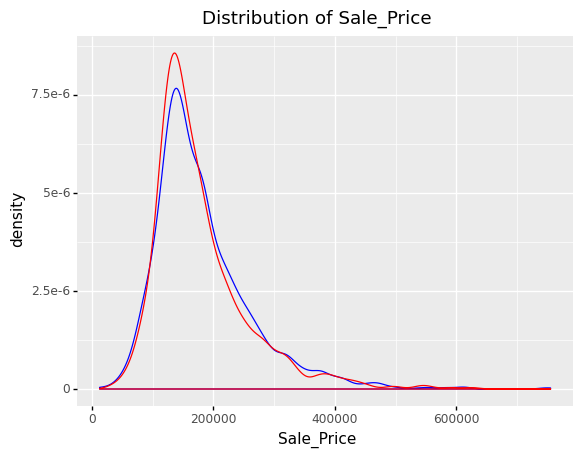

<ggplot: (8786633666238)>

In [9]:
(ggplot(train, aes(x='Sale_Price'))
 + geom_density(color='blue')
 + geom_density(data = test, color = "red")
 + ggtitle("Distribution of Sale_Price"))

## Separating features & target

* In Python, we are required to separate our features from our label into discrete data sets. 

* For our first model we will simply use two features from our training data - total square feet of the home (`Gr_Liv_Area`) and year built (`Year_Built`) to predict the sale price. 

In [10]:
# separate features from labels
X_train = train[["Gr_Liv_Area", "Year_Built"]]
y_train = train["Sale_Price"]

# Creating Models

## Creating Models with scikit-learn

Scikit-learn has many modules for supervised learning

* Linear models (i.e. ordinary least squares)
* Nearest neighbors (i.e. _K_-nearest neighbor)
* Tree-based models (i.e. decision trees, random forests)
* and many more: https://scikit-learn.org/stable/supervised_learning.html

To apply these models, they all follow a similar pattern:

1. Identify the appropriate module
2. Instantiate the model object
3. Fit the model
4. Make predictions

## Ordinary least squares

In [11]:
# 1. Prerequisite
from sklearn.linear_model import LinearRegression

In [12]:
# 2. Instantiate the model object
reg = LinearRegression()

In [13]:
# 3. Fit the model
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# 4. Make predictions
reg.predict(X_train)

array([211888.77551558, 119021.83893513, 177818.03700616, ...,
       294633.08255955, 213774.91574325, 166398.33102108])

## K-nearest neighbor

In [15]:
# 1. Prerequisite
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# 2. Instantiate the model object
knn = KNeighborsRegressor()

In [17]:
# 3. Fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
# 4. Make predictions
knn.predict(X_train)

array([218400. , 131280. , 142600. , ..., 318647.2, 180820. , 149480. ])

# <font color="red">Your Turn</font>

Create and predict a model using the random forest algorithm.

In [20]:
# 1. Prerequisite
from sklearn.ensemble import RandomForestRegressor

In [21]:
# 2. Instantiate the model object
rf = RandomForestRegressor()

In [22]:
# 3. Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
# 4. Make predictions
rf.predict(X_train)

array([164415.        , 120966.        , 142521.99206349, ...,
       293797.5       , 193363.05333333, 141562.48      ])

# Evaluating Models

### _"All models are wrong, but some are useful"_

In [28]:
house1_actual = y_train[0]
house1_actual

215000

In [30]:
my_models = [reg, knn, rf]
house1_predictions = [round(model.predict(X_train)[0]) for model in my_models]
house1_predictions

[211889, 218400, 164415]

## Evaluating model performance

- It is important to understand how our model is performing. 

- With ML models, measuring performance means understanding the predictive accuracy -- the difference between a predicted value and the actual value. 

- We measure predictive accuracy with ___loss functions___.

## Many loss functions for regression problems

* __Mean Square Error__ (MSE) = $\frac{1}{n} \sum^n_{i=1} (y_i - \hat{y}_i)^2$

* __Root Mean Square Error__ (RMSE) = $\sqrt{MSE}$

* Other common loss functions
   - Mean Absolute Error (MAE)
   - Mean Absolute Percent Error (MAPE)
   - Root Mean Squared Logarithmic Error (RMSLE)

## Computing MSE

In [31]:
# compute MSE for linear model
pred = reg.predict(X_train)
mse = mean_squared_error(y_train, pred)
mse

2313058425.399425

In [32]:
rmse = math.sqrt(mse)
rmse

48094.2660345225

On average, our model's predictions are over \\$48,000 off from the actual sales price!!

# <font color="red">Your Turn</font>

With MSE & RMSE our objective is to ___minimize___ this value. 

* Compare the MSE & RMSE for the K-nearest neighbor and random forest model to our linear model.

* Which model performs best?

* Are we certain this is the best way to measure our models' performance?

In [55]:
knn_pred = knn.predict(X_train)
math.sqrt(mean_squared_error(y_train, knn_pred))

39211.79229718879

In [56]:
rf_pred = rf.predict(X_train)
math.sqrt(mean_squared_error(y_train, rf_pred))

16485.138163756867

# Resampling Methods

In [35]:
# data split, model train, predict, & eval procedure
def model_procedure(seed):
    train, test = train_test_split(ames, train_size=0.7, random_state=seed)
    X_train = train[["Gr_Liv_Area", "Year_Built"]]
    y_train = train["Sale_Price"]
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    pred = reg.predict(X_train)
    return math.sqrt(mean_squared_error(y_train, pred))

In [40]:
seeds = range(200)
errors = [model_procedure(seed) for seed in seeds]

<AxesSubplot:ylabel='Count'>

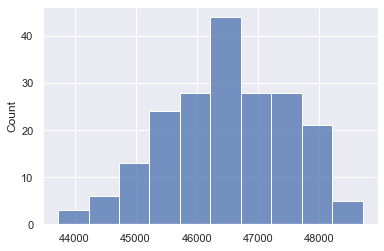

In [47]:
sns.histplot(errors)


### Resampling requires less brute force

<img src="images/resampling.png" alt="resampling" height="300">
<br>
<img src="images/grid_search_cross_validation.png" alt="resampling" height="300">

## _K_-fold CV implementation

* Use `KFold` to create k-fold objects and then 
* `cross_val_score` to train our model across all *k* folds and provide our loss score for each fold

In [57]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# fit KNN model with 10-fold CV
results = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=loss)
results

array([-44583.38859714, -39957.83856145, -52263.36195081, -46346.53026398,
       -45877.92144006, -52985.87820756, -42821.23386972, -45202.86591605,
       -48556.0637338 , -58529.11695189])

__Note__: The unified scoring API in scikit-learn always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. Consequently, you can just interpret the RMSE values below as the $RMSE \times -1$.

## _K_-fold results

In [58]:
# summary stats for all 10 folds
pd.DataFrame(results * -1).describe()

,0
count,10.000000
mean,47712.419949
std,5493.532316
min,39957.838561
25%,44738.257927
50%,46112.225852
75%,51336.537397
max,58529.116952


# <font color="red">Your Turn</font>

* Compute _K_-fold results for the linear model and/or the random forest model.

* How do the results compare?

In [67]:
# create model object
rf = RandomForestRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# fit KNN model with 10-fold CV
results = cross_val_score(rf, X_train, y_train, cv=kfold, scoring=loss)
results

array([-29968.17112939, -26836.8055982 , -33186.05170377, -24206.21860615,
       -28723.25755806, -30024.55922454, -25312.81563803, -30151.15990763,
       -28058.51943354, -44019.86216774])

In [73]:
pd.DataFrame(results).describe()

,0
count,10.000000
mean,-30048.742097
std,5554.287486
min,-44019.862168
25%,-30119.509737
50%,-29345.714344
75%,-27142.234057
max,-24206.218606


# Hyperparameter Tuning

## Bias-variance trade-off

* Prediction errors can be decomposed into two main subcomponents we have control over:

   - error due to “bias”
   - error due to “variance”

* There is a tradeoff between a model’s ability to minimize bias and variance.

* Understanding how different sources of error lead to bias and variance helps us improve the data fitting process resulting in more accurate models.

## Bias

_Bias_ is the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict.

Some models are naturally ___high bias___: 

* Models that are not very flexible (i.e. generalized linear models)
* High bias models are rarely affected by the noise introduced by resampling

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/bias-model-1.png" alt="bias" width="800">
</center>

## Variance

Error due to ___variance___ is defined as the variability of a model prediction for a given data point.

Some models are naturally high variance:

* Models that are very adaptable and offer extreme flexibility in the patterns that they can fit to (e.g., _k_-nearest neighbor, decision trees, gradient boosting machines).  
* These models offer their own problems as they run the risk of overfitting to the training data.  
* Although you may achieve very good performance on your training data, the model will not automatically generalize well to unseen data.

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/variance-model-1.png" alt="variance" width="800">
</center>

## Hyperparameter tuning

So what does this mean to you?

* We tend to like very flexible models since they can capture many patterns in our data,
* but we need to control variance so our model generalizes to new data well.
* ___Hyperparameters___ can help to control bias-variance trade-off

## Hyperparameter tuning

Hyperparameters are the "knobs to twiddle" to control of complexity of machine learning algorithms and, therefore, the bias-variance trade-off

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/example-knn-1.png" alt="variance" width="800">
</center>

_k_-nearest neighbor model with differing values for _k_. Small _k_ value has too much variance. Big _k_ value has too much bias. <font color="red">How do we find the optimal value?</font>

## Grid search

* A grid search is an automated approach to searching across many combinations of hyperparameter values

* We perform a grid search with `GridSearchCV()` and supply it a model object and hyperparameter values we want to assess. 

* Also notice that we supply it with the `kfold` object we created previously and the `loss` function we want to optimize for. 

In [85]:
# Basic model object
knn = KNeighborsRegressor()

# Hyperparameter values to assess
hyper_grid = {'n_neighbors': range(2, 26)}

# Create grid search object
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)

# Tune a knn model using grid search
results = grid_search.fit(X_train, y_train)

In [86]:
# Best model's cross validated RMSE
abs(results.best_score_)

41915.408581298376

In [87]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

5

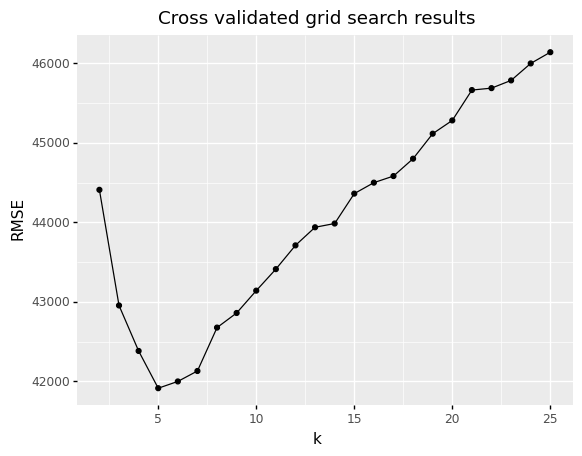

<ggplot: (320445600)>

In [88]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

# Putting the Processes Together

## Putting the Processes Together

You've been exposed to a lot in a very short amount of time. Let's bring these pieces together but rather than just look at the 2 features that we included thus far (`Gr_Liv_Area` & `Year_Built`), we'll include ___all numeric features___.

__Steps:__

1. Split into training vs testing data

2. Separate features from labels and only use numeric features

3. Create KNN model object

4. Define loss function

5. Specify _K_-fold resampling procedure

6. Create our hyperparameter grid

7. Execute grid search

8. Evaluate performance

In [89]:
# 1. Split into training vs testing data
train, test = train_test_split(ames, train_size=0.7, random_state=123)

# 2. Separate features from labels and only use numeric features
X_train = train.select_dtypes(include='number').drop(columns="Sale_Price")
y_train = train["Sale_Price"]

# 3. Create KNN model object
knn = KNeighborsRegressor()

# 4. Define loss function
loss = 'neg_root_mean_squared_error'

# 5. Specify K-fold resampling procedure
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# 6. Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# 7. Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

In [92]:
# 8. Evaluate performance: Best model's cross validated RMSE
abs(results.best_score_)

41915.408581298376

In [93]:
# 8. Evaluate performance: Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

5

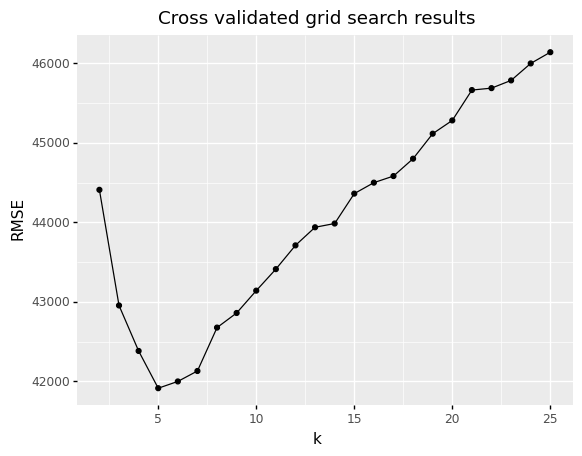

<ggplot: (320484009)>

In [94]:
# 8. Evaluate performance: Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Can we do better?

* Is this the best we can do?

* Do you think other models could perform better?

* Are we doing the best with the features we've been given?

## Learning More

* **Don't feel intimated** -- you're not going to learn this in an hour

* There are a lot of things you can do to improve your skills

* Books
  * *Introduction to Statistical Learning* or *Elements of Statistical Learning*, Hastie, Tibshirani, and Friedman
  * *Python Data Science Handbook*, Jake VanderPlas
  * *Hands-on Machine Learning with scikit-learn and TensorFlow*, Aurélien Géron

* Online Courses
  * Machine Learning with Python - Coursera

* Practice
  * Use your own data
  * Kaggle

## Questions

Are there any questions before moving on?